## Carga de la base de datos

In [1]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    database="Fraud",
    user="postgres",
    password="Hola12345")

print ('conexión exitosa')
cursor= conn.cursor()
cursor.execute('SELECT version()')

conexión exitosa


In [3]:
import pandas as pd
sql= f"""
  SELECT *
  FROM fraudes;
"""
        
# execute the query and read to a dataframe in Python
fraudes= pd.read_sql(sql, conn)

C:\Users\dayan\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


## Análisis descriptivo

Se trata de una base de datos de 15420 registros y 33 variables. En los que se presenta la información de reclamaciones de siniestro. La base nos muestran los registros de accidentes para 3 años (1994, 1995, 1996), la mayoría de siniestros ocurren el día lunes y en el mes de Enero.  923 reclamaciones fueron fraudulentas, de la cual se concluye lo siguiente: 
- Se evidencia que el número de casos fraudulentos ha disminuido año a año, cayendo en un 33,5% con respecto al año inicial
- Al realizar una prueba fisher se concluye que es estadísticamente el sexo tiene un efecto en el cometer un fraude.
- En cuanto a los grupos de edad no hay una relevancia estadística con el comerter fraude, sin embargo de forma absoluta, el mayor número de registros lo tienen las personas entre los 28 y 48 años, con 568 casos.
- Existe una correlación entre adquierir un seguro por 500 y cometer fraude
- Existe correlación entre tener un seguro todo riesgo y cometer fraude
- Existe correlación cuando el valor del vehiculo  está por debajo de 200 o mayor a 6900 y cometer fraude
- Existe correlación si entre la adiquisión del vehiculo y el accidente no hayan pasado ningún día y cometer fraude

#####  Adicional : existe correlación entre tener un vehiculo por debajo de 2000 o por encima de 6900, adquirir un seguro todo riesgo y estar en un rango de edad por encima de 48. Esta información nos sirve como un perfilamiento de las personas que tienen mayor probabiidad de comprar un seguro y hacer una reclamación fraudulenta. que se pueden en traducir en diferentes acciones: subir el precio de la pólizas para aquellas personas que tienen un vehículo por encima de 20000 o por encima de 69000, personas por encima de 48 años, entre otros. 



In [4]:
## Año en el que ocurrió el siniestro
fraudes.yearr.unique()

array([1994, 1995, 1996], dtype=int64)

In [5]:
## Número de registros
fraudes.shape

(15420, 33)

In [6]:
## Número de registros que por mes
fraudes.yearr.value_counts()

1994    6142
1995    5195
1996    4083
Name: yearr, dtype: int64

In [7]:
## cambio porcentual entre el primer año y el último año
year= fraudes.yearr.value_counts()
year.pct_change(periods= 2)

1994         NaN
1995         NaN
1996   -0.335233
Name: yearr, dtype: float64

In [8]:
## Número de registros que por mes
fraudes.dayofweek.value_counts()

Monday       2616
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Saturday     1982
Sunday       1745
Name: dayofweek, dtype: int64

In [9]:
pd.crosstab(fraudes.fraudfound_p,fraudes.monthh )

monthh,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
fraudfound_p,,,,,,,,,,,,
0,1200,1043,1223,1184,1324,1197,1241,1258,1273,1155,1235,1164
1,80,84,62,82,87,60,80,102,94,46,70,76


In [10]:
## Número de registros que fueron fraudulentos
fraudes.fraudfound_p.value_counts()

0    14497
1      923
Name: fraudfound_p, dtype: int64

In [11]:
## resgistros fraudulentos por sexo
pd.crosstab(fraudes.fraudfound_p,fraudes.sex )

sex,Female,Male
fraudfound_p,,
0,2315,12182
1,105,818


In [12]:
## se realiza una prueba fisher para revisar si existe una relación estadística entre sexo y fruade
## el p_value es menor a 0.05 por lo tanto hay suficiente información para rechazar la hipotesis nula y afirmar que existe una relación entre fraude y sexo. 
from scipy.stats import fisher_exact
import scipy.stats as stats
odd_ratio, p_value = stats.fisher_exact([[2315, 12182], [105, 818]], alternative='two-sided')
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 1.4804590691965507
p_value is : 0.00012734121515415976


In [13]:
## resgistros fraudulentos por estatus marital
pd.crosstab(fraudes.fraudfound_p,fraudes.maritalstatus )

maritalstatus,Divorced,Married,Single,Widow
fraudfound_p,,,,
0,73,9986,4406,32
1,3,639,278,3


In [14]:
# registros por categorái de vehiculos
fraudes.vehiclecategory.value_counts()

Sedan      9671
Sport      5358
Utility     391
Name: vehiclecategory, dtype: int64

In [15]:
## resgistros fraudulentos por categoría de vehiculo
pd.crosstab(fraudes.fraudfound_p,fraudes.vehiclecategory)

vehiclecategory,Sedan,Sport,Utility
fraudfound_p,,,
0,8876,5274,347
1,795,84,44


In [16]:
fraudes.basepolicy.value_counts()

Collision     5962
Liability     5009
All Perils    4449
Name: basepolicy, dtype: int64

In [17]:
pd.crosstab(fraudes.fraudfound_p,fraudes.basepolicy )

basepolicy,All Perils,Collision,Liability
fraudfound_p,,,
0,3997,5527,4973
1,452,435,36


In [18]:
## resgistros fraudulentos por sexo
pd.crosstab(fraudes.fraudfound_p,fraudes.maritalstatus )

maritalstatus,Divorced,Married,Single,Widow
fraudfound_p,,,,
0,73,9986,4406,32
1,3,639,278,3


In [19]:
fraudes.pastnumberofclaims.unique()

array(['none', '1', '2 to 4', 'more than 4'], dtype=object)

In [20]:
fraudes.days_policy_accident.unique()

array(['more than 30', '15 to 30', 'none', '1 to 7', '8 to 15'],
      dtype=object)

In [21]:
fraudes.deductible.unique()

array([300, 400, 500, 700], dtype=int64)

In [22]:
# valores de precio del vehiculo
fraudes.vehicleprice.unique()

array(['more than 69000', '20000 to 29000', '30000 to 39000',
       'less than 20000', '40000 to 59000', '60000 to 69000'],
      dtype=object)

In [23]:
## resgistros fraudulentos por precio del vehiculo
pd.crosstab(fraudes.fraudfound_p,fraudes.vehicleprice )

vehicleprice,20000 to 29000,30000 to 39000,40000 to 59000,60000 to 69000,less than 20000,more than 69000
fraudfound_p,,,,,,
0,7658,3358,430,83,993,1975
1,421,175,31,4,103,189


In [24]:
fraudes.age.describe()

count    15420.000000
mean        39.855707
std         13.492377
min          0.000000
25%         31.000000
50%         38.000000
75%         48.000000
max         80.000000
Name: age, dtype: float64

In [25]:
def edad (x):
    
    if x >= 48:
     return 3
    
    elif  28<= x <=48: 
       return 2
    
    else: 
     return 1    

fraudes['rango_edad']= fraudes['age'].apply(edad)

In [26]:
fraudes.rango_edad.value_counts()

2    9165
3    4124
1    2131
Name: rango_edad, dtype: int64

In [27]:
## resgistros fraudulentos por rango de edad
pd.crosstab(fraudes.fraudfound_p,fraudes.rango_edad)

rango_edad,1,2,3
fraudfound_p,,,
0,1985,8597,3915
1,146,568,209


In [28]:
pd.crosstab(fraudes.fraudfound_p,fraudes.deductible)

deductible,300,400,500,700
fraudfound_p,,,,
0,6,13982,216,293
1,2,856,47,18


In [29]:
## analizar las variables con varias categorías

fraudes = fraudes.astype({"vehicleprice":'category', "deductible":'category', 'days_policy_accident':'category', 
                         "pastnumberofclaims":'category', 'rango_edad':'category', 'basepolicy': 'category'})

In [30]:
### codificación dummie
df_prueba= fraudes[["vehicleprice","deductible",'days_policy_accident','pastnumberofclaims', 'rango_edad', 'fraudfound_p', 'basepolicy']]

## codificación dummy al conjunto de variables
dumm_categories = pd.get_dummies(df_prueba)

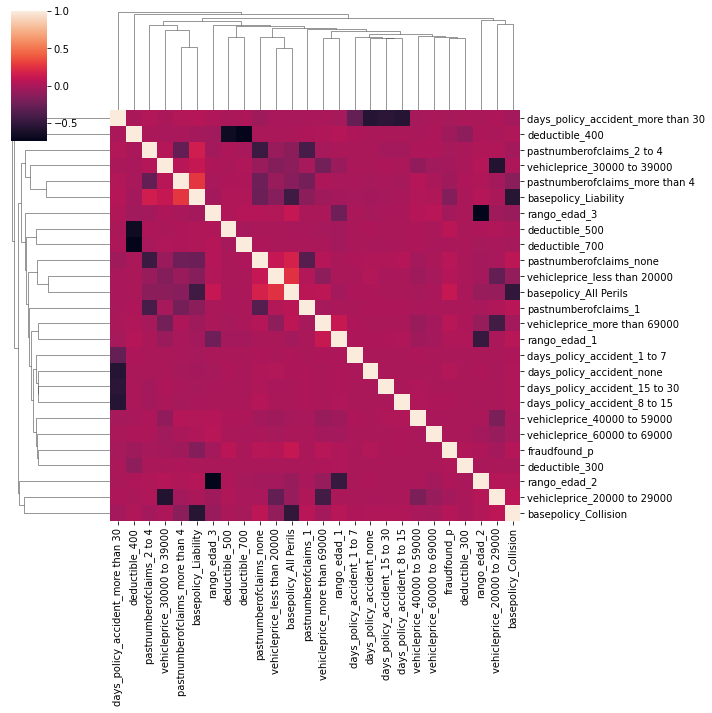

In [31]:
import seaborn as sns
sns.clustermap(dumm_categories.corr())

In [32]:
pd.crosstab(dumm_categories.fraudfound_p,dumm_categories.deductible_500)

deductible_500,0,1
fraudfound_p,,
0,14281,216
1,876,47


In [33]:
pd.crosstab(dumm_categories.fraudfound_p,dumm_categories.rango_edad_1)

rango_edad_1,0,1
fraudfound_p,,
0,12512,1985
1,777,146


In [34]:
## se realiza una prueba fisher para revisar si existe una relación estadística entre el costo del seguro sea 500  o no
## el p_value es menor a 0.05 por lo tanto hay suficiente información para rechazar la hipotesis nula y afirmar que existe una relación entre fraude y costo de 500 del seguro 

from scipy.stats import fisher_exact
import scipy.stats as stats
odd_ratio, p_value = stats.fisher_exact([[14281,216], [876 ,47]], alternative='two-sided')
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 3.547305724674446
p_value is : 1.140334359422983e-11


In [35]:
## se realiza una prueba fisher para revisar si existe una relación estadística entre el rango de edad 1 y el fraude
## el p_value es mayor a 0.05 por lo tanto no hay suficiente información para rechazar la hipotesis nula y afirmar que existe una relación entre fraude y el rango de edad_1 

from scipy.stats import fisher_exact
import scipy.stats as stats
odd_ratio, p_value = stats.fisher_exact([[12512, 1985], [777,146]], alternative='two-sided')
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 1.1843990806207432
p_value is : 0.07642120675583956


In [36]:
fraudes.columns

Index(['monthh', 'weekofmonth', 'dayofweek', 'make', 'accidentarea',
       'dayofweekclaimed', 'monthclaimed', 'weekofmonthclaimed', 'sex',
       'maritalstatus', 'age', 'fault', 'policytype', 'vehiclecategory',
       'vehicleprice', 'fraudfound_p', 'policynumber', 'repnumber',
       'deductible', 'driverrating', 'days_policy_accident',
       'days_policy_claim', 'pastnumberofclaims', 'ageofvehicle',
       'ageofpolicyholder', 'policereportfiled', 'witnesspresent', 'agenttype',
       'numberofsuppliments', 'addresschange_claim', 'numberofcars', 'yearr',
       'basepolicy', 'rango_edad'],
      dtype='object')

### 4.1 Modelo

A continuación se realiza un modelo de clasificación utilizando algunas de la variables relevantes de acuerdo al analisis exploratorio realizado. 

El objetivo con este modelo es identificar aquellos reportes de siniestros que por sus características tienen mayor  probabilidad de ser fraudulento o no. De esta forma se inicia seleccionando las variables de interés y convertir aquellas variables categoricas es dummies, seguido a esto se balancea  la muestra y se comienza a realizar el entreamiento del modelo. 

Como resultado, he logrado desarrollar un modelo con una precisión del 66,6%. El valor agregado que este tipo de modelo proporciona al negocio radica en su eficiencia para identificar posibles casos fraudulentos, lo cual ayudaría a reducir las pérdidas. Sin embargo, para mejorar el rendimiento del modelo, es importante continuar explorando otras variables que nos permitan enriquecerlo y proporcionar una mejor explicación de la ocurrencia de casos fraudulentos.

In [37]:
### variables a manejear: De acuerdo con el analisis anterior se eligen las siguientes variables para construir el modelo

df= fraudes[["vehicleprice","deductible",'days_policy_accident', 'sex', 'fraudfound_p', 'basepolicy']]

## conjunto de datos categoricos 

categories= df.select_dtypes(include=['category'])
non_categories=  df.select_dtypes(exclude=['category'])


## codificación dummy al conjunto de variables
dumm_categories = pd.get_dummies(categories)

# Unión de las variables numéricas con las codificadas
df_fraude = pd.concat([non_categories, dumm_categories], axis=1)


In [38]:
# recodificación de la variable sexo 
df_fraude['sex']= df_fraude['sex'].map({'Female':0, 'Male':1})
df_fraude.sex

0        0
1        1
2        1
3        1
4        0
        ..
15415    1
15416    1
15417    1
15418    0
15419    1
Name: sex, Length: 15420, dtype: int64

In [39]:
## se eligen las categorías relevantes
df_fraude.columns

Index(['sex', 'fraudfound_p', 'vehicleprice_20000 to 29000',
       'vehicleprice_30000 to 39000', 'vehicleprice_40000 to 59000',
       'vehicleprice_60000 to 69000', 'vehicleprice_less than 20000',
       'vehicleprice_more than 69000', 'deductible_300', 'deductible_400',
       'deductible_500', 'deductible_700', 'days_policy_accident_1 to 7',
       'days_policy_accident_15 to 30', 'days_policy_accident_8 to 15',
       'days_policy_accident_more than 30', 'days_policy_accident_none',
       'basepolicy_All Perils', 'basepolicy_Collision',
       'basepolicy_Liability'],
      dtype='object')

In [41]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [42]:
## se balancea la base de datos. pues de los mas de 15 mil registros, solo 900 presentan fraude
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

train= df_fraude.copy()
test= df_fraude.copy()

X_train = train.loc[:, train.columns != 'fraudfound_p']
y_train = train.loc[:, train.columns == 'fraudfound_p']
X_test = test.loc[:, test.columns != 'fraudfound_p']
y_test = test.loc[:, test.columns == 'fraudfound_p']

columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['fraudfound_p'])

# verificación del balanceo de la base
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['fraudfound_p']==0]))
print("Number of subscription",len(os_data_y[os_data_y['fraudfound_p']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['fraudfound_p']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['fraudfound_p']==1])/len(os_data_X))

length of oversampled data is  28994
Number of no subscription in oversampled data 14497
Number of subscription 14497
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn import metrics

# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_fraud, y_fraud, test_size=.37, random_state=123)

# Entrenamiento del modelo de regresión logística
clf_logistic_fraud = LogisticRegression(multi_class="ovr", solver='sag', penalty='l2', C=1.0, class_weight='balanced').fit(X_train, y_train)

# Predicciones de probabilidad 
preds_fraud = clf_logistic_fraud.predict_proba(X_test)

# Marcos de datos de las primeras cinco predicciones y las primeras cinco etiquetas verdaderas
preds_df_fraud = pd.DataFrame(preds_fraud[:,1][0:20], columns = ['prob_default'])
true_df_fraud = y_test.head(20)

# Comparación de los dos marcos de datos
print(pd.concat([true_df_fraud.reset_index(drop = True), preds_df_fraud], axis = 1))

    fraudfound_p  prob_default
0              0      0.133053
1              1      0.545561
2              0      0.545561
3              1      0.702912
4              1      0.620713
5              1      0.510319
6              0      0.620713
7              1      0.510319
8              1      0.657452
9              1      0.702912
10             0      0.570363
11             0      0.702912
12             1      0.620218
13             0      0.101383
14             0      0.610398
15             0      0.089201
16             1      0.601066
17             0      0.545561
18             1      0.634456
19             0      0.601066


In [45]:
print("model score: %.3f" % clf_logistic_fraud.score(X_test, y_test))

model score: 0.660
